# Minflux data extraction

Load files to analyise and export the data using classes


In [1]:
# Some imports
import sys
import os, glob
from mfxdata import MfxData 
import re
import math


In [8]:
# Set names
# Reading from network drive Zarr is still rather slow. Do not know why. 
# Write/read to a 'local' Harddrive is 10x faster. The whole handling of a file takes 2 min, instead of 10-30 sec

OUTDIR_LOC = 'C:/Users/apoliti/Desktop/mflux_zarr_tmp_storage/analysis/' # Main directory to store zarr files
OUTDIR_REM =  'Z:/siva_minflux/analysis/'  # Main directory to store results 
INDIR  = 'Z:/siva_minflux/data/'       # main directory of msr file

# Multiple washes with different imager strand
indir_mwash = {'Syp_ATG9': INDIR + '/Multiwash/Syp_ATG9/', 
             'ZnT3_Syp': INDIR + '/Multiwash/ZnT3_Syp/'}
outdir_mwash = {'Syp_ATG9': OUTDIR_REM +  '/Multiwash/Syp_ATG9/', 
                'ZnT3_Syp': OUTDIR_REM +  '/Multiwash/ZnT3_Syp/'}
zarrdir_mwash = {'Syp_ATG9': OUTDIR_LOC + '/Multiwash/Syp_ATG9', 
                'ZnT3_Syp': OUTDIR_LOC + '/Multiwash/ZnT3_Syp/'}

# Wash with a single imager strand
indir_swash = {'Syp': INDIR + '/Single wash/Syp/', 
             'ATG9': INDIR + '/Single wash/ATG9/'}
outdir_swash = {'Syp': OUTDIR_REM +  '/Single wash/Syp/', 
                'ATG9': OUTDIR_REM +  '/Single wash/ATG9/'}
zarrdir_swash = {'Syp': OUTDIR_LOC +  '/Single wash/Syp/', 
                'ATG9': OUTDIR_LOC +  '/Single wash/ATG9/'}

# Consitency controls. Wash with a single imager strand but multiple times. 
indir_cwash = {'VGLUT1_VGLUT1': INDIR + '/Multiwash/VGLUT1_VGLUT1'}
outdir_cwash = {'VGLUT1_VGLUT1': OUTDIR_REM +  '/Multiwash/VGLUT1_VGLUT1'}
zarrdir_cwash = {'VGLUT1_VGLUT1': OUTDIR_LOC +  '/Multiwash/VGLUT1_VGLUT1'}




# Create a list of msr files to process
msr_mwash = {}
for key in indir_mwash:
    msr_mwash[key] = glob.glob(indir_mwash[key] + '*.msr')

msr_swash = {}
for key in indir_swash:
    msr_swash[key] = glob.glob(indir_swash[key] + '*.msr')
    

Z:/siva_minflux/data//Multiwash/Syp_ATG9\220510_Syp_ATG9_ROI01.msr
{'220510-Syp_P1': 'C:/Users/apoliti/Desktop/mflux_zarr_tmp_storage/analysis//Multiwash/Syp_ATG9\\220510_Syp_ATG9_ROI01\\220510-Syp_P1', '220510-ATG9_P2': 'C:/Users/apoliti/Desktop/mflux_zarr_tmp_storage/analysis//Multiwash/Syp_ATG9\\220510_Syp_ATG9_ROI01\\220510-ATG9_P2'}
['R0', 'R1', 'R2', 'R3', 'R4', 'R9']


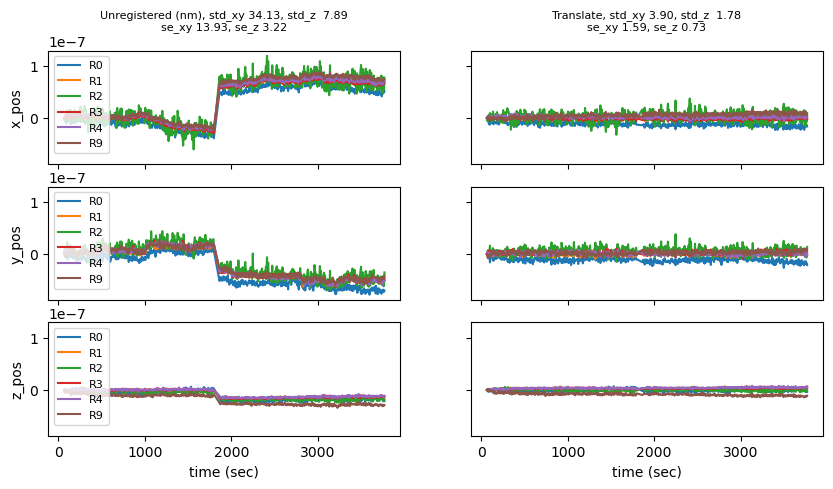

In [3]:
# Preview data mwash

idfile = 0
wash_key = 'Syp_ATG9'
mfx = MfxData(msr_mwash[wash_key][idfile], outdir_main=outdir_mwash[wash_key], 
                      zarr_dir_main=zarrdir_mwash[wash_key])
print(mfx.msrfile_path)

mfx.zarr_import()
print(mfx.zarrdir)
mfx.set_valid_ref()
print(mfx.valid_ref_beads)
#mfx.valid_ref_beads = ['R15', 'R17', 'R3', 'R32']
regis = mfx.get_ref_transform()
mfx.show_ref_transform(translate=regis[mfx.TRANS], rotate=None, save=True, show=True)


In [4]:
# Valid msr files, for instance because lacking of common reference. This can be fixed at a later time point 
invalid_mwash = {'220510_Syp_ATG9_ROI02.msr', '220825_Syp_ATG9_ROI01.msr'}
exclude_beads_mwash = {'220510_Syp_ATG9_ROI03.msr': ['R4'], '220601_Syp_ATG9_ROI03.msr': ['R10'], 
                       '220825_Syp_ATG9_ROI01.msr': ['R13']}
# Syp_ATG9
# 220510_Syp_ATG9_ROI01.msr: 6 beads, good
# 220510_Syp_ATG9_ROI02.msr: No common beads
# 220510_Syp_ATG9_ROI03.msr: Exclude R4
# 220601_Syp_ATG9_ROI01.msr: 3 beads, ok
# 220601_Syp_ATG9_ROI02.msr: 4 beads, good
# 220601_Syp_ATG9_ROI03.msr: 4 beads, ok,  exclude R10
# 220601_Syp_ATG9_ROI04.msr: 4 beads, good
# 220601_Syp_ATG9_ROI05.msr: 4 beads, ok
# 220601_Syp_ATG9_ROI06.msr: 4 beads, good
# 220601_Syp_ATG9_ROI07.msr: 3 beads, ok
# 220614_Syp_ATG9_ROI01.msr: 3 beads, ok
# 220825_Syp_ATG9_ROI01.msr: 5 beads, poor, strange fluctuations. Exclude R13. Failed to align ??

#ZnT3_Syp
# 220309_ZnT3_Syp_ROI01.msr: 2 beads!!, poor
# 220309_ZnT3_Syp_ROI02.msr: 3 beads, ok 
# 220309_ZnT3_Syp_ROI03.msr: 2 beads!!, poor



Z:/siva_minflux/data//Multiwash/Syp_ATG9\220510_Syp_ATG9_ROI01.msr
['R0', 'R1', 'R2', 'R3', 'R4', 'R9']
['R0', 'R1', 'R2', 'R3', 'R4', 'R9']


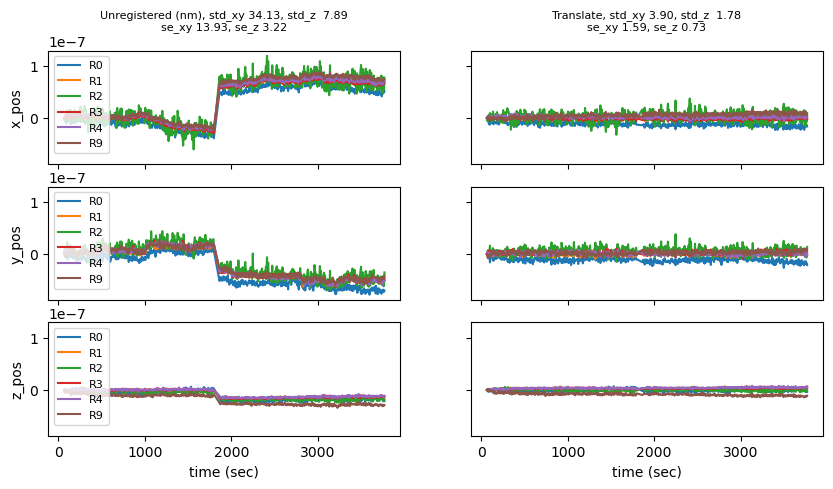

Valid tracks 220510-Syp_P1 615/46945
Localizations in invalid tracks 220510-Syp_P1 3/50968
Valid tracks 220510-ATG9_P2 392/62083
Localizations in invalid tracks 220510-ATG9_P2 6/65016

Z:/siva_minflux/data//Multiwash/Syp_ATG9\220510_Syp_ATG9_ROI03.msr
['R0', 'R1', 'R2', 'R4']
['R0', 'R1', 'R2']


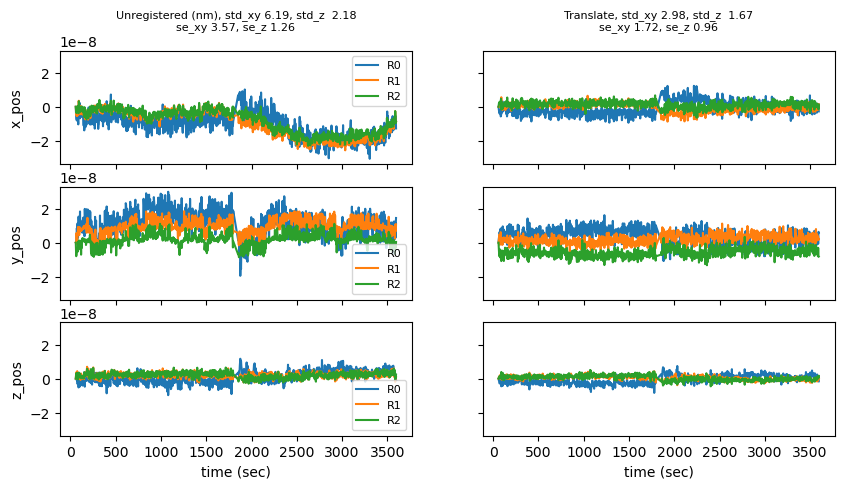

Valid tracks 220510_Syp_P1 1297/45515
Localizations in invalid tracks 220510_Syp_P1 8/55526
Valid tracks 220510_ATG9_P2 951/51343
Localizations in invalid tracks 220510_ATG9_P2 3/58610

Z:/siva_minflux/data//Multiwash/Syp_ATG9\220601_Syp_ATG9_ROI01.msr
['R2', 'R3', 'R8']
['R2', 'R3', 'R8']


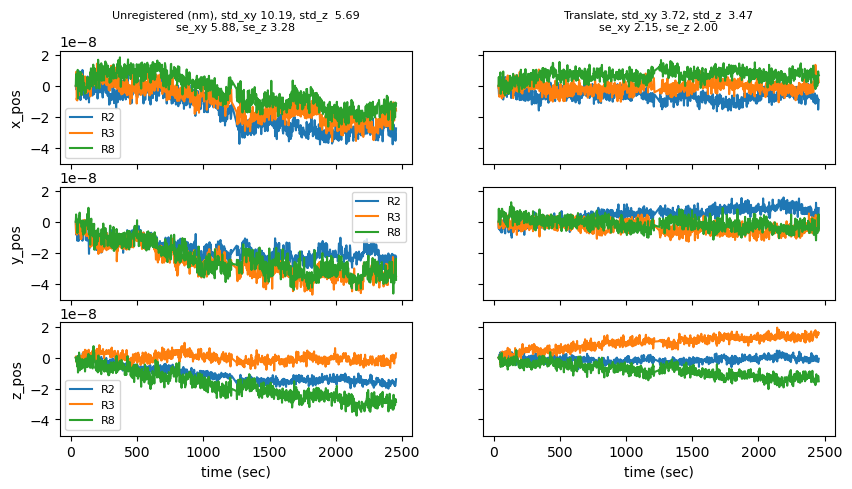

Valid tracks 220601_Syp_P1 96/35243
Localizations in invalid tracks 220601_Syp_P1 25/35682
Valid tracks 220601_ATG9_P2 36/36554
Localizations in invalid tracks 220601_ATG9_P2 12/36706

Z:/siva_minflux/data//Multiwash/Syp_ATG9\220601_Syp_ATG9_ROI02.msr
['R10', 'R2', 'R5', 'R6']
['R10', 'R2', 'R5', 'R6']


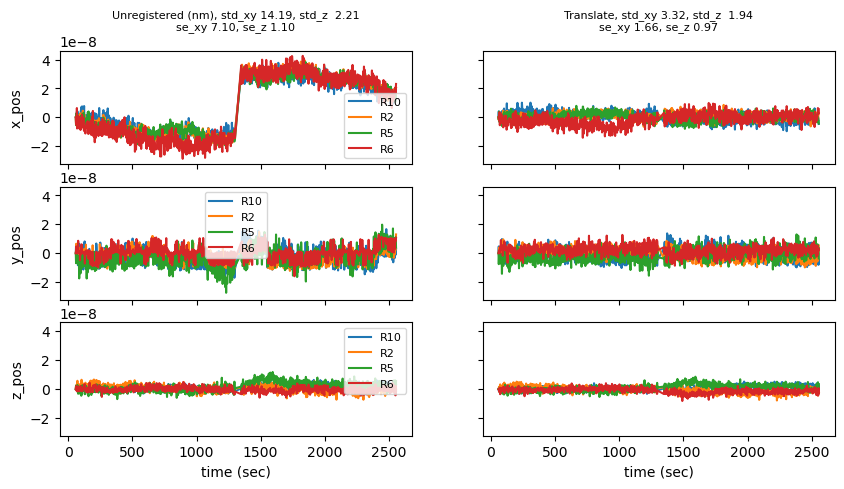

Valid tracks 220601_Syp_P1 60/30413
Localizations in invalid tracks 220601_Syp_P1 37/30621
Valid tracks 220601_ATG9_P2 13/30688
Localizations in invalid tracks 220601_ATG9_P2 6/30735

Z:/siva_minflux/data//Multiwash/Syp_ATG9\220601_Syp_ATG9_ROI03.msr
['R10', 'R2', 'R5', 'R6']
['R2', 'R5', 'R6']


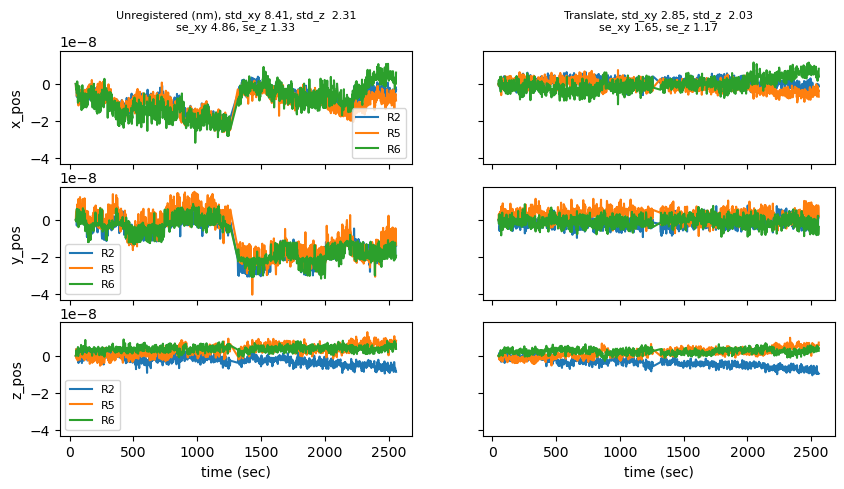

Valid tracks 220601_Syp_P1 32/46302
Localizations in invalid tracks 220601_Syp_P1 2/46433
Valid tracks 220601_ATG9_P2 20/46215
Localizations in invalid tracks 220601_ATG9_P2 7/46308

Z:/siva_minflux/data//Multiwash/Syp_ATG9\220601_Syp_ATG9_ROI04.msr
['R10', 'R2', 'R5', 'R6']
['R10', 'R2', 'R5', 'R6']


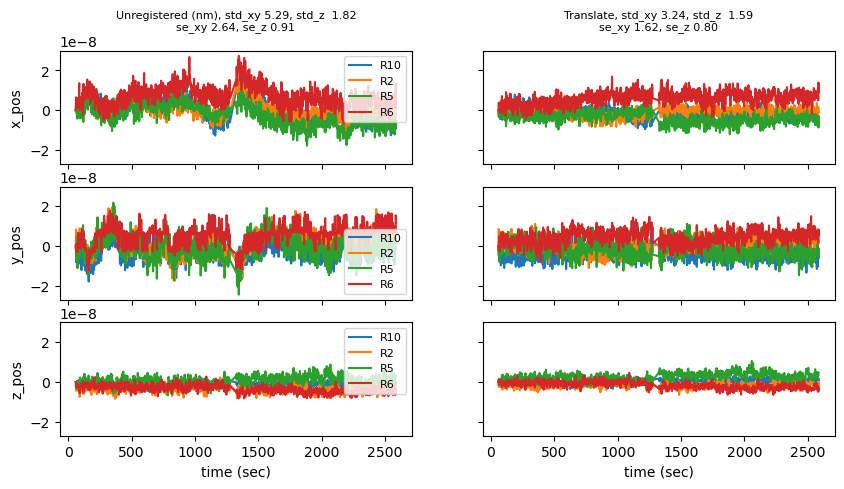

Valid tracks 220601_Syp_P1 85/29952
Localizations in invalid tracks 220601_Syp_P1 8/30313
Valid tracks 220601_ATG9_P2 106/31978
Localizations in invalid tracks 220601_ATG9_P2 8/32633

Z:/siva_minflux/data//Multiwash/Syp_ATG9\220601_Syp_ATG9_ROI05.msr
['R1', 'R3', 'R4', 'R5']
['R1', 'R3', 'R4', 'R5']


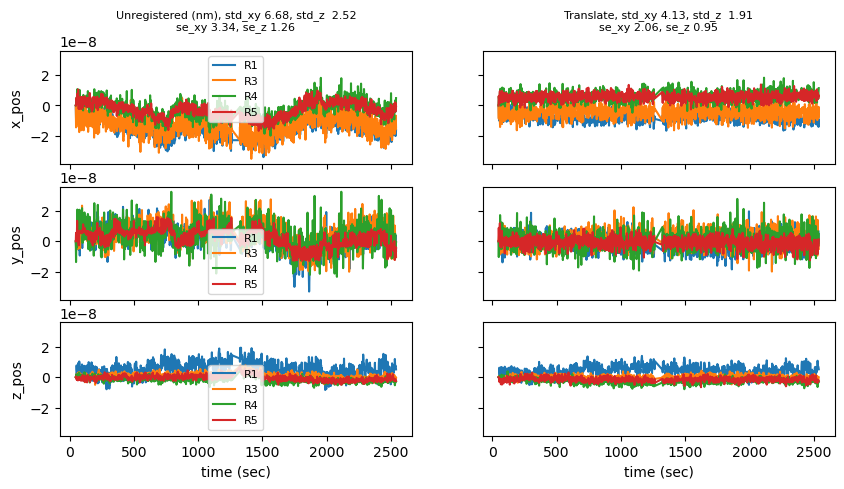

Valid tracks 220601_Syp_P1 322/25197
Localizations in invalid tracks 220601_Syp_P1 48/26502
Valid tracks 220601_ATG9_P2 150/24969
Localizations in invalid tracks 220601_ATG9_P2 31/25664

Z:/siva_minflux/data//Multiwash/Syp_ATG9\220601_Syp_ATG9_ROI06.msr
['R1', 'R3', 'R4', 'R5']
['R1', 'R3', 'R4', 'R5']


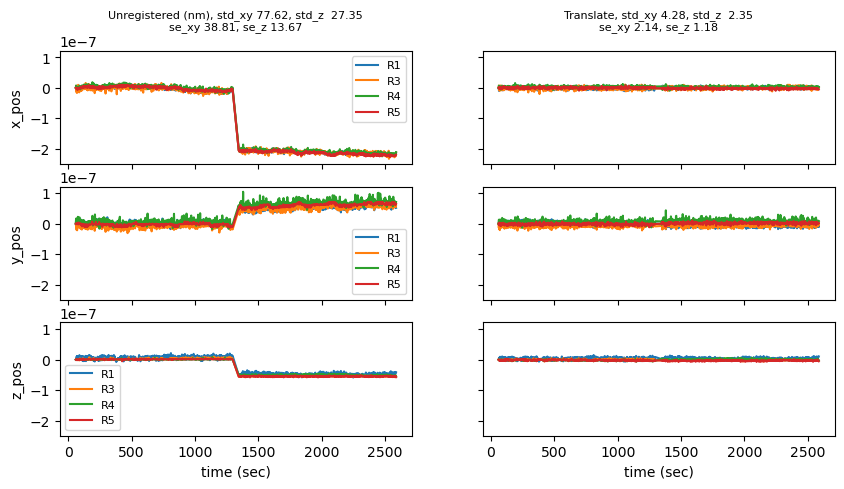

Valid tracks 220601_Syp_P1 260/20820
Localizations in invalid tracks 220601_Syp_P1 48/21902
Valid tracks 220601_ATG9_P2 62/21873
Localizations in invalid tracks 220601_ATG9_P2 8/22107

Z:/siva_minflux/data//Multiwash/Syp_ATG9\220601_Syp_ATG9_ROI07.msr
['R2', 'R3', 'R4']
['R2', 'R3', 'R4']


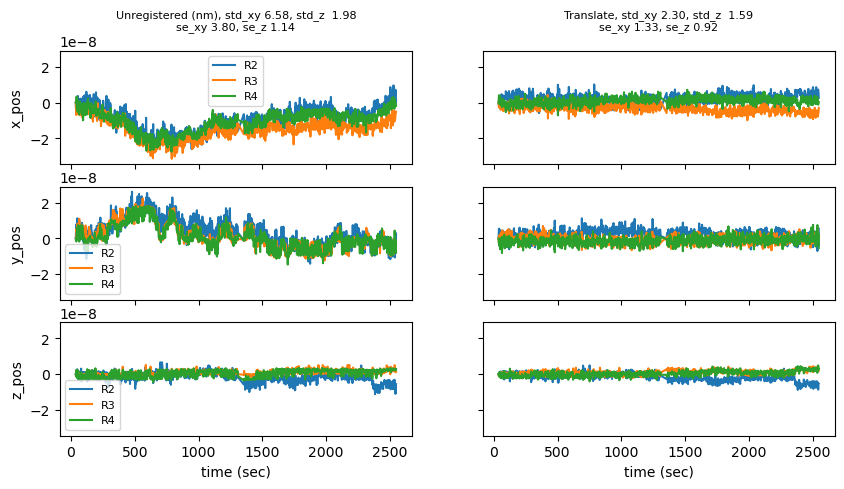

Valid tracks 220601_Syp_P1 228/40386
Localizations in invalid tracks 220601_Syp_P1 51/41287
Valid tracks 220601_ATG9_P2 74/37776
Localizations in invalid tracks 220601_ATG9_P2 21/38103

Z:/siva_minflux/data//Multiwash/Syp_ATG9\220614_Syp_ATG9_ROI01.msr
['R13', 'R20', 'R7']
['R13', 'R20', 'R7']


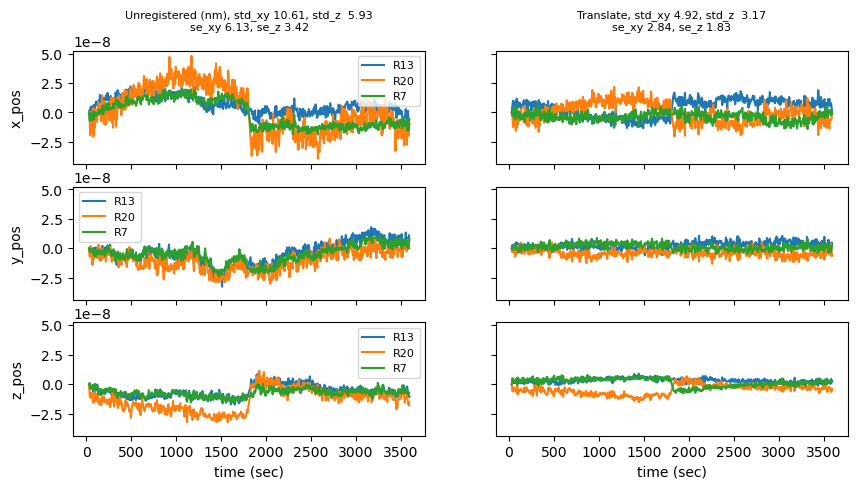

Valid tracks 220614_Syn_P1 2130/48132
Localizations in invalid tracks 220614_Syn_P1 5/59822
Valid tracks 220614_ATG9_P2 1335/53333
Localizations in invalid tracks 220614_ATG9_P2 7/61261

Z:/siva_minflux/data//Multiwash/ZnT3_Syp\220309_ZnT3_Syp_ROI01.msr
['R3', 'R4']
['R3', 'R4']


T:\Antonio_Politi\Code\minflux-analysis\python\mfxdata.py:204: UserWarning: Less than 3 reference beads, rotation registration is not computed
  warnings.warn("Less than 3 reference beads, rotation registration is not computed", category=UserWarning)


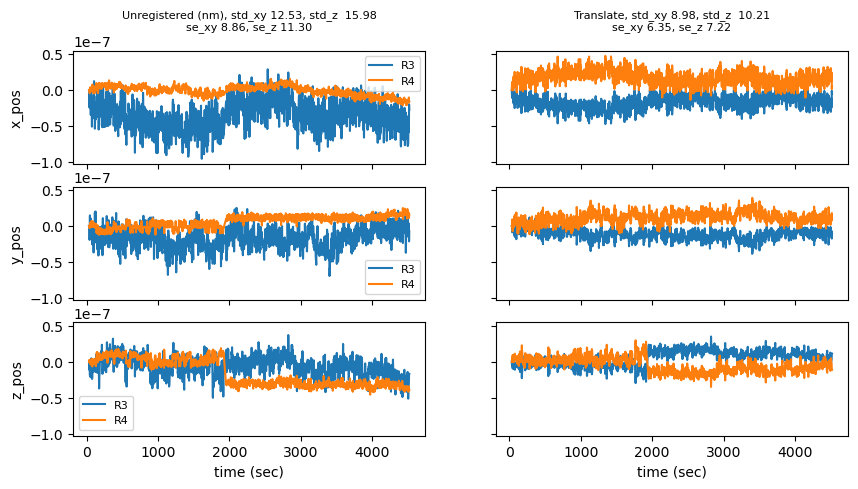

Valid tracks 220309_ZnT3_P1 518/81569
Localizations in invalid tracks 220309_ZnT3_P1 16/84897
Valid tracks 220309_Syp_P2 1168/103172
Localizations in invalid tracks 220309_Syp_P2 24/110589

Z:/siva_minflux/data//Multiwash/ZnT3_Syp\220309_ZnT3_Syp_ROI02.msr
['R10', 'R6', 'R9']
['R10', 'R6', 'R9']


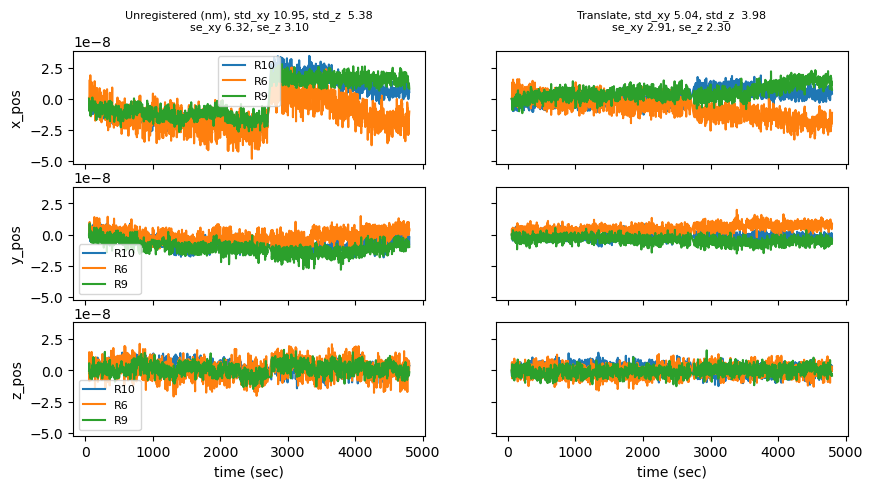

Valid tracks 220309_ZnT3_P1 362/82966
Localizations in invalid tracks 220309_ZnT3_P1 10/85508
Valid tracks 220309_Syp_P2 725/62887
Localizations in invalid tracks 220309_Syp_P2 11/67052

Z:/siva_minflux/data//Multiwash/ZnT3_Syp\220309_ZnT3_Syp_ROI03.msr
['R3', 'R4']
['R3', 'R4']


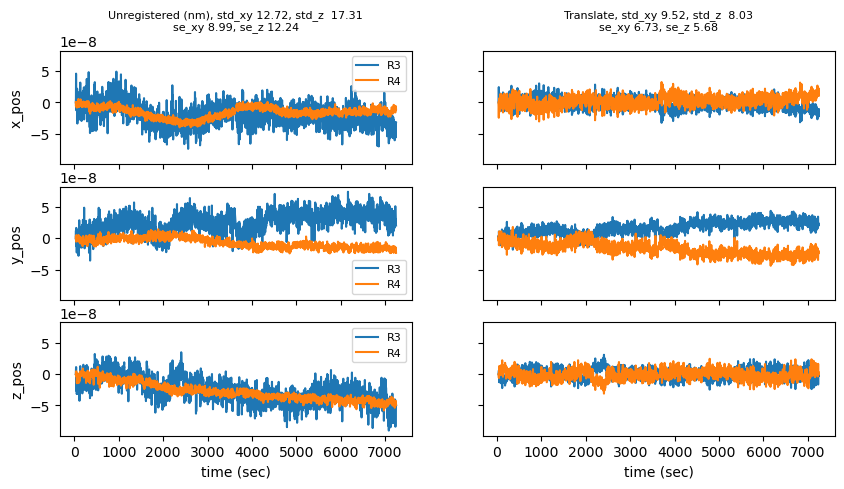

Valid tracks 220309_ZnT3_P1 3410/119776
Localizations in invalid tracks 220309_ZnT3_P1 62/137165
Valid tracks 220309_Syp_P2 3232/122355
Localizations in invalid tracks 220309_Syp_P2 32/138796


In [5]:
# Realign data 
for wash_key in msr_mwash:
    for file_path in msr_mwash[wash_key]:
        file_name = os.path.basename(file_path)
        if os.path.basename(file_path) in invalid_mwash:
            continue
        mfx = MfxData(file_path, outdir_main=outdir_mwash[wash_key], 
                      zarr_dir_main=zarrdir_mwash[wash_key])
        
        mfx.zarr_import()
        mfx.set_valid_ref()
        print('\n'+ mfx.msrfile_path)
        print(mfx.valid_ref_beads)
        if file_name in exclude_beads_mwash:
            mfx.valid_ref_beads = [x for x in mfx.valid_ref_beads if x not in exclude_beads_mwash[file_name]]
        print(mfx.valid_ref_beads)
        regis = mfx.get_ref_transform()
        mfx.show_ref_transform(translate=regis[mfx.TRANS], rotate=None, save=True, show=True)
        out_data_dict = mfx.align_to_ref()
        mfx.export_numpy(out_data_dict)
        mfx.export_ref_mat()
        
        

In [12]:
# Preview data single

idfile = 2
wash_key = 'Syp'
mfx = MfxData(msr_swash[wash_key][idfile], outdir_main=outdir_swash[wash_key], 
                      zarr_dir_main=zarrdir_swash[wash_key])
print(mfx.msrfile_path)

mfx.zarr_import()
print(mfx.zarrdir)
mfx.set_valid_ref()
print(mfx.valid_ref_beads)
#mfx.valid_ref_beads = ['R15', 'R17', 'R3', 'R32']
regis = mfx.get_ref_transform()
mfx.show_ref_transform(translate=regis[mfx.TRANS], rotate=None, save=False, show=True)

Z:/siva_minflux/data//Single wash/Syp\220825_Syp_ROI4.msr
Create Zarr data structure
{'220825_Syp_P1': 'C:/Users/apoliti/Desktop/mflux_zarr_tmp_storage/analysis//Single wash/Syp/220825_Syp_ROI4\\220825_Syp_P1'}
[]


IndexError: list index out of range

In [ ]:
# Valid msr files, for instance because lacking of common reference. This can be fixed at a later time point 
invalid_swash = {'220510_Syp_ATG9_ROI02.msr', '220825_Syp_ATG9_ROI01.msr'}
exclude_beads_swash = {'220510_Syp_ATG9_ROI03.msr': ['R4'], '220601_Syp_ATG9_ROI03.msr': ['R10'], 
                       '220825_Syp_ATG9_ROI01.msr': ['R13']}
# 220825_Syp_ROI2.msr: 3 beads, Ok
# 220825_Syp_ROI3.msr: 2 beads!, poor